In [2]:
import pandas as pd

###`Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi', 'mumbai') as level-0 Index
* And Sort on row index level-0

In [2]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [94]:
# code here
df.swapaxes(axis1=0,axis2=1).swaplevel(axis=1).swaplevel().sort_index(level=0)

2019 2020 2021 2022 2019 2020 2021 2022
                    cse  cse  cse  cse  ece  ece  ece  ece
avg_package delhi     1    3    5    7    9   11   13   15
            mumbai    0    0    0    0    0    0    0    0
students    delhi     2    4    6    8   10   12   14   16
            mumbai    0    0    0    0    0    0    0    0

###`Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [3]:
confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')

deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

In [4]:
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='deaths')
confirm.head(2)

,Province/State,Country/Region,Lat,Long,date,deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0


In [5]:
deaths = deaths.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='cases')
deaths.head(2)

,Province/State,Country/Region,Lat,Long,date,cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0


In [9]:
final_df = confirm.merge(deaths, on=['Province/State','Country/Region','Lat','Long','date'])[['Province/State','Country/Region','date','deaths','cases']]
final_df['Province/State'].fillna('Unknown',inplace=True)

In [16]:
final_df = final_df.pivot_table(index=['Country/Region','Province/State'],aggfunc={'deaths':'sum','cases':'sum'})
final_df

,,cases,deaths
Country/Region,Province/State,,
Afghanistan,Unknown,4901323,116218938
Albania,Unknown,2248012,163505982
Algeria,Unknown,4447129,164830894
Andorra,Unknown,116300,21390392
Angola,Unknown,1104387,53083822
...,...,...,...
West Bank and Gaza,Unknown,3377981,366130648
Winter Olympics 2022,Unknown,0,179152
Yemen,Unknown,1372952,7091065


###`Q-3:` Show Country with Heighest death percent out of confirmed Cases.

In [42]:
# code here
total_cases = final_df.groupby('Country/Region')['deaths'].sum().sum()
((final_df.groupby('Country/Region')['deaths'].sum()/total_cases)*100).round(4).sort_values(ascending=False).reset_index().head(10)

,Country/Region,deaths
0,US,17.2580
1,India,9.6035
2,Brazil,6.8781
3,France,4.9457
4,Germany,4.1037
5,United Kingdom,3.8511
6,Russia,3.3542
7,Italy,3.0822
8,Turkey,2.8302
9,"Korea, South",2.3756


### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases.

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 =

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]
```

In [156]:
# code here
final_df.groupby('Country/Region')['deaths'].sum()

Country/Region
Australia         2762855772
Canada            1960090418
China              838616728
Denmark             16784445
France             434510016
Netherlands         48576471
New Zealand          1662113
United Kingdom      78840350
Name: deaths, dtype: int64

### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [43]:
# code here
df = pd.read_csv('population.csv')
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [45]:
df.drop(columns='Unnamed: 0',inplace=True)

In [60]:
#1
df.pivot_table(index=['Country','City/Town'],values='PM10').sort_values(by='PM10',ascending=False).loc['India'].head(1)

#2
df.pivot_table(index=['Country','City/Town'],values='PM10').sort_values(by='PM10').loc['India'].head(1)

,PM10
City/Town,
Aizawl,44.0


In [63]:
#3
df.pivot_table(index=['Country','City/Town'],values='PM10').sort_values(by='PM10').loc['China'].head(1)
df.pivot_table(index=['Country','City/Town'],values='PM10').sort_values(by='PM10',ascending=False).loc['China'].head(1)

,PM10
City/Town,
Xingtai,186.0


<AxesSubplot:ylabel='None'>

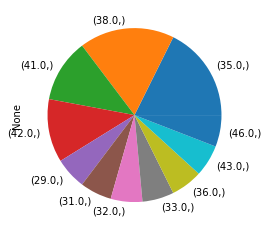

In [85]:
(df.pivot_table(index=['Country','City/Town'],values='PM10').loc['Poland']).value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Country,City/Town'>

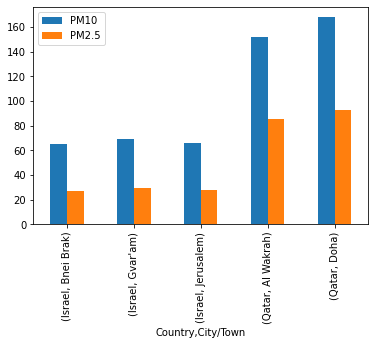

In [90]:
df.pivot_table(index=['Country','City/Town'],values=['PM10','PM2.5']).loc[['Israel','Qatar']].plot(kind='bar')

In [92]:
df.pivot_table(index=['Country','City/Town'],values='PM10').stack()

Country  City/Town             
Bahrain  Hamad Town        PM10    318.0
         Hidd              PM10    178.0
         Ma'ameer          PM10    257.0
         Manama            PM10    154.0
         Nabih Saleh       PM10    244.0
                                   ...  
Turkey   Sakarya           PM10     60.0
         Sivas             PM10     56.0
Uganda   Kampala           PM10    170.0
Vietnam  Hanoi             PM10    102.0
         Ho Chi Minh City  PM10     90.0
Length: 497, dtype: float64